In [1]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

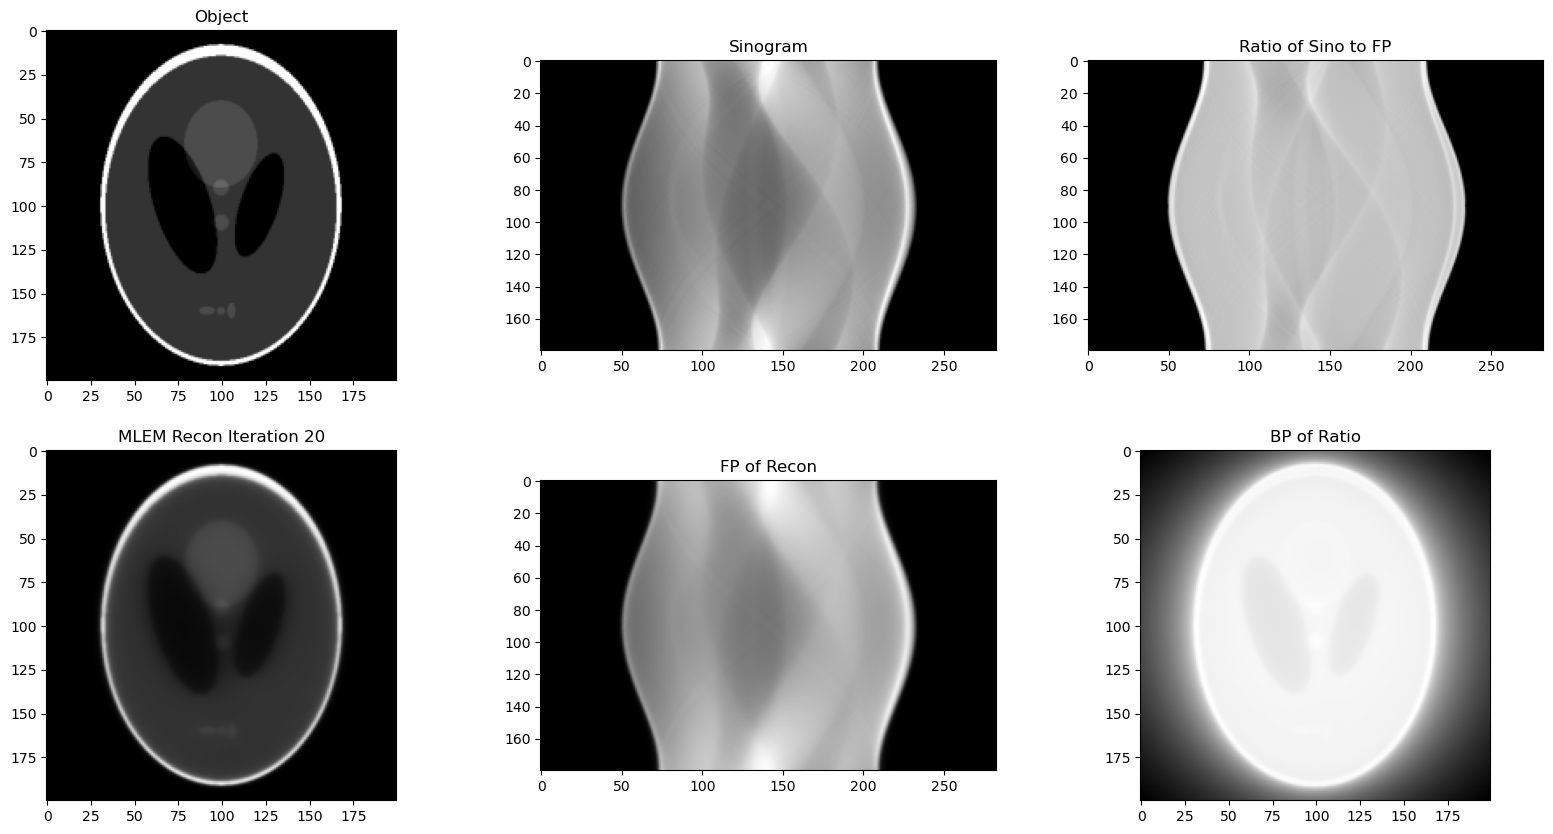

In [8]:
activity_level = 0.1 # Simulated radioactivity level, 0.0 to 1.0
true_object = shepp_logan_phantom()
true_object = rescale(activity_level * true_object, 0.5)

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].imshow(true_object, cmap='gray')
axs[0, 0].set_title('Object')

# Generate simulated sinogram data
azi_angles = np.linspace(0, 180, 180, endpoint=False)
sinogram = radon(true_object, theta=azi_angles, circle=False)

axs[0, 1].imshow(sinogram.T, cmap='gray')
axs[0, 1].set_title('Sinogram')

# Reconstruct the image from the sinogram
mlem_rec = np.ones(true_object.shape) # Iteration 0, k=0
sino_ones = np.ones(sinogram.shape)
sens_image = iradon(sino_ones, theta=azi_angles, circle=False, filter_name=None) # Sensitivity image, no filter

for iter in range(20):
    fp = radon(mlem_rec, theta=azi_angles, circle=False)  # Forward projection iteration k, Ax^k
    ratio = sinogram / (fp + 0.000001)  # Ratio of measured to estimated sinogram (avoiding division by zero)
    correction = iradon(ratio, theta=azi_angles, circle=False, filter_name=None)  # Back projection of ratio

    axs[1, 0].imshow(mlem_rec, cmap='gray')
    axs[1, 0].set_title('MLEM Recon')
    axs[1, 1].imshow(fp.T, cmap='gray')
    axs[1, 1].set_title('FP of Recon')
    axs[0, 2].imshow(ratio.T, cmap='gray')
    axs[0, 2].set_title('Ratio of Sino to FP')
    axs[1, 2].imshow(correction, cmap='gray')
    axs[1, 2].set_title('BP of Ratio')

    mlem_rec = mlem_rec * correction
    axs[1, 0].imshow(mlem_rec, cmap='gray')
    axs[1, 0].set_title(f'MLEM Recon Iteration {iter + 1}')

    display(fig)
    clear_output(wait=True)
    plt.pause(0.01)